In [70]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from pprint import pprint

data1 = json.load(open('berlin52_2018-04-13T09_21_17.705Z.json'))
data2 = json.load(open('berlin52_2018-04-18T20_36_44.966Z.json'))
data = data1 + data2

data = list(map(lambda x: x['path'], data))
data = [list(map(lambda x: x['currentNodeId'], d)) for d in data]

df = pd.DataFrame(data).fillna(0).astype(int)
indices = df.index[df[6] == 0].tolist()

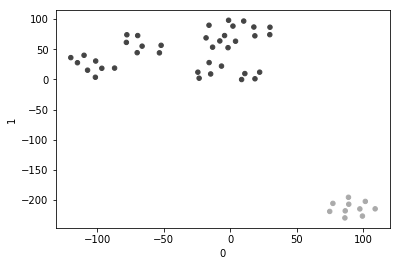

In [106]:
colormap = ["#444444" for i in range(len(data))]
for index in indices:
    colormap[index] = "#AAAAAA"
colormap = np.array(colormap)
output = TSNE(n_components=2, perplexity=10).fit_transform(df)
pd.DataFrame(output).plot.scatter(x=0, y=1, c=colormap)